# About DataSet
This dataset includes 30 different subjects touching a specific touchpad. The subjects were asked to make 10 types of touches on the surface in the same order and to pull their hands. The main purpose is to identify touch type and user.

# Loading Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

np.random.seed(37)
df = pd.read_csv("common-dataset.csv")
df.head()


,user_id,touch_type,touch,finger,palm,fist,1,2,3,4,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0,0,False,False,False,False,4,0,12,-16,...,-51,4,1,3,-42,2,3,61,2,-1
1,0,0,False,False,False,False,-52,-2,17,1,...,-36,-1,49,6,-58,8,49,63,47,6
2,0,0,False,False,False,False,2,7,14,-5,...,1,55,54,-51,-26,55,56,9,55,52
3,0,0,False,False,False,False,0,6,10,8,...,1,2,28,2,1,9,55,53,-7,51
4,0,0,False,False,False,False,2,5,3,0,...,-25,51,-6,-45,-4,61,48,60,46,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Columns: 3206 entries, user_id to 3200
dtypes: bool(4), int64(3202)
memory usage: 50.2 MB


In [3]:
data=df.values
df.describe()

,user_id,touch_type,1,2,3,4,5,6,7,8,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,...,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,14.144455,2.208658,6.383268,-0.736868,-1.372568,-1.951848,-0.771401,-0.479086,0.716926,0.893482,...,0.269942,9.160506,7.529183,-1.431420,4.392023,10.382782,6.484922,3.776265,3.038911,16.335603
std,8.776936,3.059943,37.765997,7.140939,8.932638,10.529769,12.400623,9.899473,13.253678,14.909682,...,31.318870,31.483043,35.528682,36.167375,37.094317,36.713209,37.415322,39.689446,36.621301,33.422914
min,0.000000,0.000000,-62.000000,-22.000000,-23.000000,-27.000000,-29.000000,-28.000000,-31.000000,-34.000000,...,-56.000000,-58.000000,-61.000000,-66.000000,-62.000000,-61.000000,-62.000000,-69.000000,-65.000000,-56.000000
25%,7.000000,0.000000,-2.000000,-6.000000,-8.000000,-9.000000,-9.000000,-7.000000,-7.000000,-9.000000,...,-21.000000,-9.000000,-4.000000,-37.000000,-27.000000,-5.000000,-7.000000,-10.000000,-16.000000,-1.000000
50%,14.000000,0.000000,3.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,5.000000,1.000000,4.000000,5.000000,5.000000,3.000000,1.000000,7.000000
75%,22.000000,4.000000,53.000000,5.000000,4.000000,6.000000,9.000000,7.000000,11.000000,13.000000,...,25.000000,34.000000,32.000000,13.000000,27.000000,49.000000,45.000000,22.000000,30.000000,51.000000
max,29.000000,9.000000,70.000000,21.000000,21.000000,23.000000,41.000000,22.000000,70.000000,46.000000,...,72.000000,100.000000,104.000000,92.000000,82.000000,107.000000,103.000000,101.000000,103.000000,99.000000


# Splitting Data

In [4]:
y_user_id = data[:,0]
y_touch_type = data[:,1]
y_touch_ver = data[:,2:6]
y_user_id=y_user_id.astype('int64')
y_touch_type=y_touch_type.astype('int64')
y_touch_ver=y_touch_ver.astype('bool')

In [5]:
x=data[:,6:]
x=x.astype('int64')
x

array([[  4,   0,  12, ...,  61,   2,  -1],
       [-52,  -2,  17, ...,  63,  47,   6],
       [  2,   7,  14, ...,   9,  55,  52],
       ...,
       [  8,  -9, -12, ...,  20,  64,  68],
       [ 56,   0,   0, ...,   6,  -6,  51],
       [ 11,  -1, -12, ...,   9,  52,  52]], dtype=int64)

# Setting Train and Test Data

In [6]:
from sklearn.model_selection import train_test_split
x_train_user_id, x_test_user_id, y_train_user_id, y_test_user_id = train_test_split(x, y_user_id, test_size = 0.25, random_state = 37)
x_train_touch_type, x_test_touch_type, y_train_touch_type, y_test_touch_type = train_test_split(x, y_touch_type, test_size = 0.25, random_state = 37)
x_train_ver, x_test_ver, y_train_ver, y_test_ver = train_test_split(x, y_touch_ver, test_size = 0.25, random_state = 37)

# Fitting Train Data to Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(x_train_user_id, y_train_user_id)

RandomForestClassifier()

In [8]:
print(clf.feature_importances_)

[7.97775870e-05 8.24893565e-05 2.36553463e-04 ... 2.85893151e-04
 3.89446544e-05 3.24691741e-05]


In [9]:
y_prediction = clf.predict(x_test_user_id)

# Performance Evaluation of User ID

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_user_id, y_prediction)

1.0

In [11]:
print(clf.predict_proba(x_test_user_id))

[[0.   0.   0.01 ... 0.   0.   0.01]
 [0.01 0.   0.   ... 0.01 0.02 0.01]
 [0.02 0.02 0.02 ... 0.   0.01 0.02]
 ...
 [0.01 0.01 0.01 ... 0.01 0.   0.  ]
 [0.   0.01 0.   ... 0.01 0.   0.02]
 [0.01 0.01 0.01 ... 0.   0.01 0.  ]]


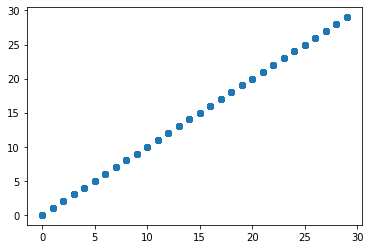

In [12]:
dataset = pd.DataFrame({'Test': y_test_user_id, 'Pred': y_prediction}, columns=['Test', 'Pred'])
#visualisation
plt.scatter(data=dataset, x='Test', y='Pred')

# Performance Evaluation of Touch Type

In [13]:
clf_touch_type = RandomForestClassifier()
clf_touch_type.fit(x_train_touch_type, y_train_touch_type)
print(clf_touch_type.feature_importances_)
y_prediction = clf_touch_type.predict(x_test_touch_type)
accuracy_score(y_test_touch_type, y_prediction)

[7.28881502e-05 5.53180701e-05 1.05192949e-04 ... 1.62747708e-04
 1.74701719e-04 2.39251155e-04]


0.6867704280155642

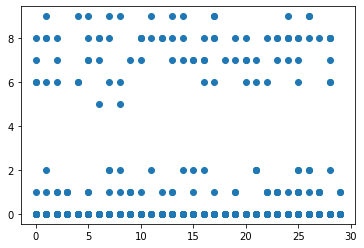

In [14]:
dataset = pd.DataFrame({'Test': y_test_user_id, 'Pred': y_prediction}, columns=['Test', 'Pred'])
plt.scatter(data=dataset, x='Test', y='Pred')

# Using MlkNN and Performance Evaluation of Touch Types
MLkNN builds uses k-NearestNeighbors find nearest examples to a test class and uses Bayesian inference to select assigned labels.
We are using MlkNN because we have multilabel on this data.

In [15]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=4)

# train
classifier.fit(x_train_ver, y_train_ver)

# predict
predictions = classifier.predict(x_test_ver)

accuracy_score(y_test_ver,predictions)

0.77431906614786